In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
raw_data = pd.read_csv("drug200.csv")
raw_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
raw_data.shape

(200, 6)

In [14]:
X = raw_data.iloc[:,:-1].values
X

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607000000000001],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767000000000001],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.941999999999997],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.515999999999998],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972000000000001],
       [23, 'M', 'LOW', 'HIGH', 7.297999999999999],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M

* Enconding can be done using the dummies

In [7]:
pd.get_dummies(raw_data, columns=raw_data.columns[1:4])

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,drugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,drugY,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,drugC,1,0,0,1,0,1,0
196,16,12.006,drugC,0,1,0,1,0,1,0
197,52,9.894,drugX,0,1,0,0,1,1,0
198,23,14.020,drugX,0,1,0,0,1,0,1


* Encoding using the label encoder in sklear preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder

sex_features = LabelEncoder()
sex_features.fit(["F","M"])
X[:,1] = sex_features.transform(X[:,1])
X

array([[23, 0, 'HIGH', 'HIGH', 25.355],
       [47, 1, 'LOW', 'HIGH', 13.093],
       [47, 1, 'LOW', 'HIGH', 10.113999999999999],
       [28, 0, 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 0, 'LOW', 'HIGH', 18.043],
       [22, 0, 'NORMAL', 'HIGH', 8.607000000000001],
       [49, 0, 'NORMAL', 'HIGH', 16.275],
       [41, 1, 'LOW', 'HIGH', 11.037],
       [60, 1, 'NORMAL', 'HIGH', 15.171],
       [43, 1, 'LOW', 'NORMAL', 19.368],
       [47, 0, 'LOW', 'HIGH', 11.767000000000001],
       [34, 0, 'HIGH', 'NORMAL', 19.199],
       [43, 1, 'LOW', 'HIGH', 15.376],
       [74, 0, 'LOW', 'HIGH', 20.941999999999997],
       [50, 0, 'NORMAL', 'HIGH', 12.703],
       [16, 0, 'HIGH', 'NORMAL', 15.515999999999998],
       [69, 1, 'LOW', 'NORMAL', 11.455],
       [43, 1, 'HIGH', 'HIGH', 13.972000000000001],
       [23, 1, 'LOW', 'HIGH', 7.297999999999999],
       [32, 0, 'HIGH', 'NORMAL', 25.974],
       [57, 1, 'LOW', 'NORMAL', 19.128],
       [63, 1, 'NORMAL', 'HIGH', 25.916999999999998],
  

In [16]:
bp_features = LabelEncoder()
bp_features.fit(["HIGH", "LOW", "NORMAL"])
X[:,2] = bp_features.transform(X[:,2])
X

array([[23, 0, 0, 'HIGH', 25.355],
       [47, 1, 1, 'HIGH', 13.093],
       [47, 1, 1, 'HIGH', 10.113999999999999],
       [28, 0, 2, 'HIGH', 7.797999999999999],
       [61, 0, 1, 'HIGH', 18.043],
       [22, 0, 2, 'HIGH', 8.607000000000001],
       [49, 0, 2, 'HIGH', 16.275],
       [41, 1, 1, 'HIGH', 11.037],
       [60, 1, 2, 'HIGH', 15.171],
       [43, 1, 1, 'NORMAL', 19.368],
       [47, 0, 1, 'HIGH', 11.767000000000001],
       [34, 0, 0, 'NORMAL', 19.199],
       [43, 1, 1, 'HIGH', 15.376],
       [74, 0, 1, 'HIGH', 20.941999999999997],
       [50, 0, 2, 'HIGH', 12.703],
       [16, 0, 0, 'NORMAL', 15.515999999999998],
       [69, 1, 1, 'NORMAL', 11.455],
       [43, 1, 0, 'HIGH', 13.972000000000001],
       [23, 1, 1, 'HIGH', 7.297999999999999],
       [32, 0, 0, 'NORMAL', 25.974],
       [57, 1, 1, 'NORMAL', 19.128],
       [63, 1, 2, 'HIGH', 25.916999999999998],
       [47, 1, 1, 'NORMAL', 30.568],
       [48, 0, 1, 'HIGH', 15.036],
       [33, 0, 1, 'HIGH', 33.486],
      

In [17]:
cholesterol_features = LabelEncoder()
cholesterol_features.fit(["HIGH", "NORMAL"])
X[:,3] = cholesterol_features.transform(X[:,3])
X

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607000000000001],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368],
       [47, 0, 1, 0, 11.767000000000001],
       [34, 0, 0, 1, 19.199],
       [43, 1, 1, 0, 15.376],
       [74, 0, 1, 0, 20.941999999999997],
       [50, 0, 2, 0, 12.703],
       [16, 0, 0, 1, 15.515999999999998],
       [69, 1, 1, 1, 11.455],
       [43, 1, 0, 0, 13.972000000000001],
       [23, 1, 1, 0, 7.297999999999999],
       [32, 0, 0, 1, 25.974],
       [57, 1, 1, 1, 19.128],
       [63, 1, 2, 0, 25.916999999999998],
       [47, 1, 1, 1, 30.568],
       [48, 0, 1, 0, 15.036],
       [33, 0, 1, 0, 33.486],
       [28, 0, 0, 1, 18.809],
       [31, 1, 0, 0, 30.366],
       [49, 0, 2, 1, 9.381],
       [39, 0, 1, 1, 22.697],
       [45, 1, 1, 0, 17.95

In [19]:
y = raw_data.iloc[:,-1].values
y

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

### Setting up Decision Tree

We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.


In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=3)

### Modeling

In [22]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction

In [26]:
predTree = drugTree.predict(X_test)
predTree

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX'], dtype=object)

### Evaluation

In [28]:
from sklearn.metrics import accuracy_score

print("Accuracy of decision tree algorithm: ", accuracy_score(y_test, predTree))

Accuracy of decision tree algorithm:  1.0


In [41]:
from sklearn.externals import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

ImportError: cannot import name 'StringIO' from 'sklearn.externals' (C:\Users\Arjun Janamatti\Anaconda3\envs\new\lib\site-packages\sklearn\externals\__init__.py)

[Text(209.25, 195.696, 'X[4] <= 14.829\nentropy = 1.921\nsamples = 160\nvalue = [19, 12, 12, 38, 79]'),
 Text(167.4, 152.208, 'X[2] <= 0.5\nentropy = 1.819\nsamples = 81\nvalue = [19, 12, 12, 38, 0]'),
 Text(83.7, 108.72, 'X[0] <= 50.5\nentropy = 0.963\nsamples = 31\nvalue = [19, 12, 0, 0, 0]'),
 Text(41.85, 65.232, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0, 0, 0, 0]'),
 Text(125.55000000000001, 65.232, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12, 0, 0, 0]'),
 Text(251.10000000000002, 108.72, 'X[3] <= 0.5\nentropy = 0.795\nsamples = 50\nvalue = [0, 0, 12, 38, 0]'),
 Text(209.25, 65.232, 'X[2] <= 1.5\nentropy = 0.999\nsamples = 23\nvalue = [0, 0, 12, 11, 0]'),
 Text(167.4, 21.744, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(251.10000000000002, 21.744, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(292.95, 65.232, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27, 0]'),
 Text(251.10000000000002, 152.208, 'entropy = 0.0\nsamples = 79\nvalue = [0, 

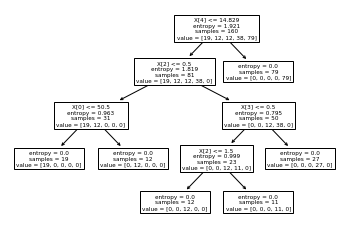

In [53]:
from sklearn import tree

tree.plot_tree(drugTree)
